<a href="https://colab.research.google.com/github/Biokatzen/Hepatitis-C-Prediction-Dataset/blob/main/Copia_de_HepatitisC_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction Dataset

The dataset used in this study contains data from female and male blood donors and patients suffering from hepatitis C, fibrosis and cirrhosis with ages ranged from 19 to 77. These are the categorical variables that will be used for classification and clustering later on. The numerical variables are the following: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, which are traditional diagnostic tests for liver diseases.

The table below resumes all the attributes found in this dataset:


| **Attribute** | **Value** | **Value Label** | **Type** | **Description** |
|----------------|----------------|-----------------|-----------|-----------------|
| **Patient ID/No.** | Numeric | – | Integer | Patient identification |
| **Category** | 0 | Blood Donor | Categorical | Diagnosis of the patient. Blood donor vs Hepatitis C including its progress to Fibrosis and Cirrhosis |
|  | 0s | Suspect Blood Donor |  |  |
|  | 1 | Hepatitis |  |  |
|  | 2 | Fibrosis |  |  |
|  | 3 | Cirrhosis |  |  |
| **Age** | Numeric | – | Integer |  |
| **Sex** | f | Female | Binary |  |
|  | m | Male |  |  |
| **ALB** | Numeric | – | Continuous | Albumin Blood Test (g/L)|
| **ALP** | Numeric | – | Continuous | Alkaline Phosphatase (U/L) |
| **ALT** | Numeric | – | Continuous | Alanine Transaminase (U/L) |
| **AST** | Numeric | – | Continuous | Aspartate Transaminase (U/L)|
| **BIL** | Numeric | – | Continuous | Bilirubin (µmol/L) |
| **CHE** | Numeric | – | Continuous | Acetylcholinesterase (U/mL)|
| **CHOL** | Numeric | – | Continuous | Cholesterol (mmol/L) |
| **CREA** | Numeric | – | Continuous | Creatinine (µmol/L) |
| **GGT** | Numeric | – | Continuous | Gamma-Glutamyl Transferase (U/L) |
| **PROT** | Numeric | – | Continuous | Total Protein (g/L)|


In [1]:
import pandas as pd
import os

Firstly, the dataset is loaded into google colab  enviroment and printed to have a first look. As we can see below, the dataset has 615 rows and 14 columns

In [2]:

df = pd.read_csv('HepatitisCdata.csv', header=0, sep=';')
df.shape
print(df)

      ID       Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0      1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93   
1      2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17   
2      3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84   
3      4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33   
4      5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15   
..   ...            ...  ...  ..   ...    ...    ...    ...   ...    ...   
610  611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57   
611  612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54   
612  613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66   
613  614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56   
614  615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  
0    3.23  106.0   12.1  69.0  
1    4.80   74.0   15.6

As seen in the dataset, the first column corresponds to the patiend ID, which is not very informative, so it can get deleted


In [3]:
#Delete first column
df.drop(columns=['ID'], inplace=True)
print(df)

          Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5

An important pre-processing step is handle the NA values. Firstly the NA values are counted by column to have an idea of how many are they and also the amount of NAs of each category in the Category column is checked.

In [4]:
#See the number of NAs of each column
print(df.isna().sum())

#See the distribution of NAs for each Category
df['Category'].value_counts(normalize=True)



Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


,proportion
Category,
0=Blood Donor,0.866667
3=Cirrhosis,0.048780
1=Hepatitis,0.039024
2=Fibrosis,0.034146
0s=suspect Blood Donor,0.011382


As we can see above, the columns with the most NA values are CHOL and ALP with 10 and 18 NA values respectively. But as the dataset has 615 rows, removing these rows won't make a big impact in the model.

Additionally the Sex and Category variables, as they are categorical, they should be changed to binary in order to create the correlation matrix. The Category variable has ordinal data so it is better to use the Label Encoding method whereas the Sex variable should be encoded using One-Hot Encoding as it does not have any ordinal data.

But for splitting the dataset into train and test this encoded dataset won't be used, but the previous one

In [5]:
from sklearn.preprocessing import LabelEncoder
#Remove rows with NA values
df_without_na = df.dropna()
print(df['Category'].value_counts(normalize=True))


#One-Hot Encoding method for Sex column
df_encoded = pd.get_dummies(df_without_na, columns=["Sex"], drop_first=True, dtype=int)

#Label Encoding method for Category column
encoder = LabelEncoder()
df_encoded["Category"] = encoder.fit_transform(df_encoded["Category"])

print(df_encoded)


Category
0=Blood Donor             0.866667
3=Cirrhosis               0.048780
1=Hepatitis               0.039024
2=Fibrosis                0.034146
0s=suspect Blood Donor    0.011382
Name: proportion, dtype: float64
     Category  Age   ALB    ALP   ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0           0   32  38.5   52.5   7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1           0   32  38.5   70.3  18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2           0   32  46.9   74.7  36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3           0   32  43.2   52.0  30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4           0   32  39.2   74.1  32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..        ...  ...   ...    ...   ...    ...   ...    ...   ...    ...    ...   
608         4   58  34.0   46.4  15.0  150.0   8.0   6.26  3.98   56.0   49.7   
609         4   59  39.0   51.3  19.6  285.8  40.0   5.77  4.51  136.1  101.1   
610         4   62  32.0  416.6   5.9  110.3  50.0   5

Checking the NAs proportions per category we can see the have not changed really, so eliminating the NAs is a good decision.
Once the NA values have been eliminated and the categorical columns have been encoded as binary values, we can have a look to the matrix of correlations to see if there is any interesting correlation between numerical variables that is worth to investigate through linear regression

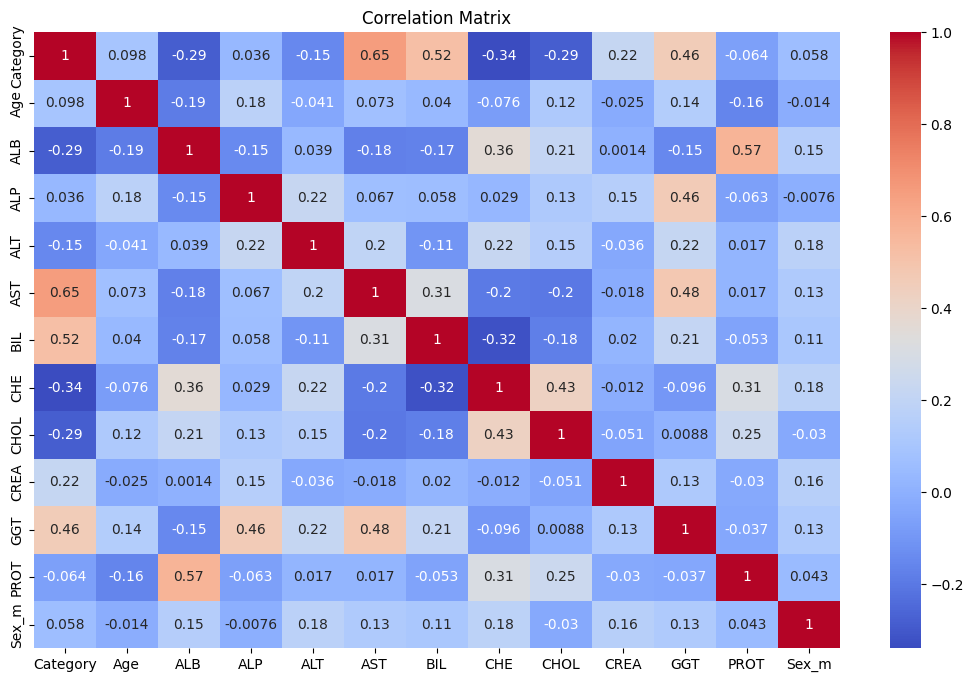

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Corelation matrix
plt.figure(figsize=(13,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


From the correlations matrix we can observe how the biggest correlations, either positive or negative, are associated with the Category variable, meaning they are associated with the state of disease (Healthy, Hepatitis, Fibrosis, Cirrhosis) but taking a look at the numbers, any of them are strong correlations, as the highest one is +0.65.

Having a look at the matrix, an interesting target to predict with linear regression would be AST (Alanine transaminase), as it is associated with hepatic disease and it have some moderate correlations with other parameters.

First step into the regression model is to check and remove outliers but doing this in all the dataset could produce data leackage, so before that we need to divide the dataset into train and test datasets.
In this case our target will be AST and the features will be the rest of the parameters in the dataset

# Regression

In [9]:

from sklearn.model_selection import train_test_split

#We use df_without_na here because is the previous dataset before encoding for correlation visualization, so we use it to avoid data leackage
#Features (X) and target (y)
X = df_without_na.drop('ALT', axis=1)
y = df_without_na["ALT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Once we have the dataset divided, we can encode categorical variables for X_train and X_test

In [10]:
#One-Hot Encoding method for Sex column
X_train = pd.get_dummies(X_train, columns=["Sex"], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=["Sex"], drop_first=True, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#Label Encoding method for Category column
encoder = LabelEncoder()
X_train["Category"] = encoder.fit_transform(X_train["Category"])
X_test["Category"] = encoder.transform(X_test["Category"])



Next, we can remove outliers calculating z scores in the training set and removing the ones that are too far away from the average value (3 standard deviations is the typical threshold)

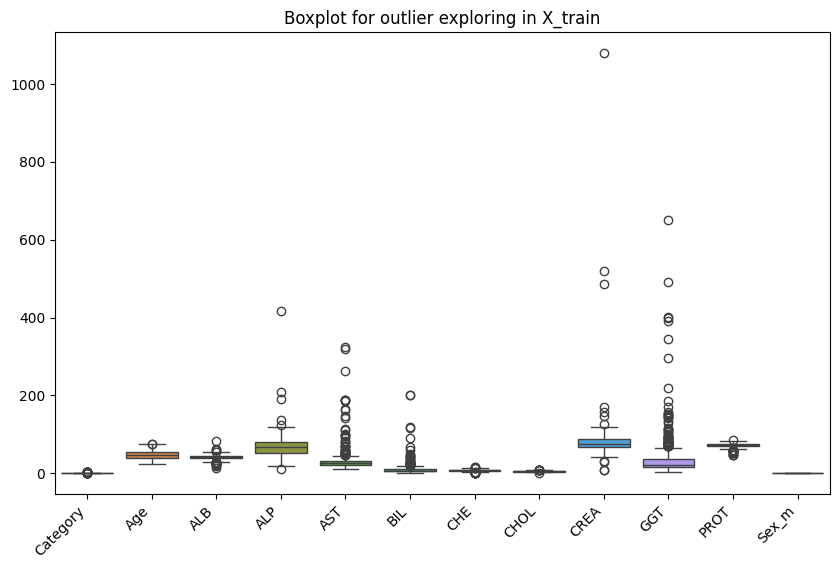

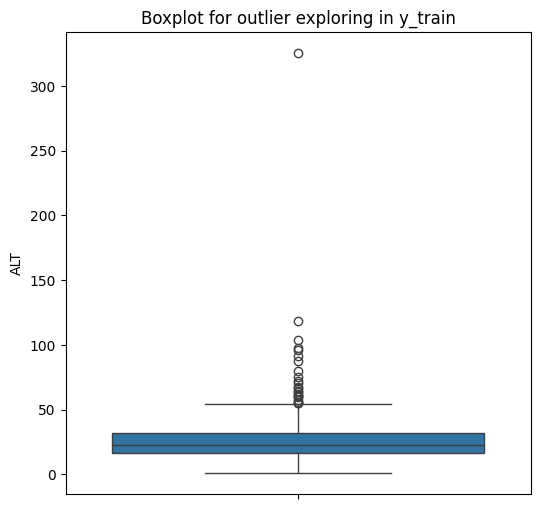

Number of rows for X_train: 418
Number of columns for X_train: 12
Number of rows for y_train: 418

Original dataset: 589
Rows after eliminating outliers: 418
Outliers removed: 171


In [11]:
import numpy as np
from scipy.stats import zscore

#Boxplot for exploring outliers in feature train data
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot for outlier exploring in X_train")
plt.show()

#Boxplot for exploring outliers in target train data
plt.figure(figsize=(6, 6))
sns.boxplot(data=y_train)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot for outlier exploring in y_train")
plt.show()

#Calculate z scores for X_train and y_train
z_scores_X = np.abs(zscore(X_train))
z_score_y = np.abs(zscore(y_train))

# Define threshold to remove outliers
threshold = 3

# Create masks for both X and y training data
mask_train_X = (z_scores_X < threshold).all(axis=1)
mask_train_y = (z_score_y < threshold) # y_train is 1D, no need for .all(axis=1)

# Combine masks: keep rows where there are no outliers in either X or y
combined_mask_train = mask_train_X & mask_train_y

X_train_clean = X_train[combined_mask_train]
y_train_clean = y_train[combined_mask_train]

print("Number of rows for X_train: {0}\nNumber of columns for X_train: {1}".format(X_train_clean.shape[0], X_train_clean.shape[1]))
print("Number of rows for y_train: {}\n".format(y_train_clean.shape[0]))

#Number of outliers removed
print(f'Original dataset: {df_encoded.shape[0]}')
print(f"Rows after eliminating outliers: {X_train_clean.shape[0]}")
print(f"Outliers removed: {df_encoded.shape[0] - X_train_clean.shape[0]}")

Checking the boxplots for training data (both features and target) we can observe very obvious outliers that must be removed.
The outliers have been removed calculating the z score and removing the rows with a z score higher than 3 in both X and y training data.

After outlier removal, we can see that the rows of both X_train and y_train are the same, so the analysis continue.

The next step is to check if the distribution of data is normal on each variable. For this, histogram plots have been created.

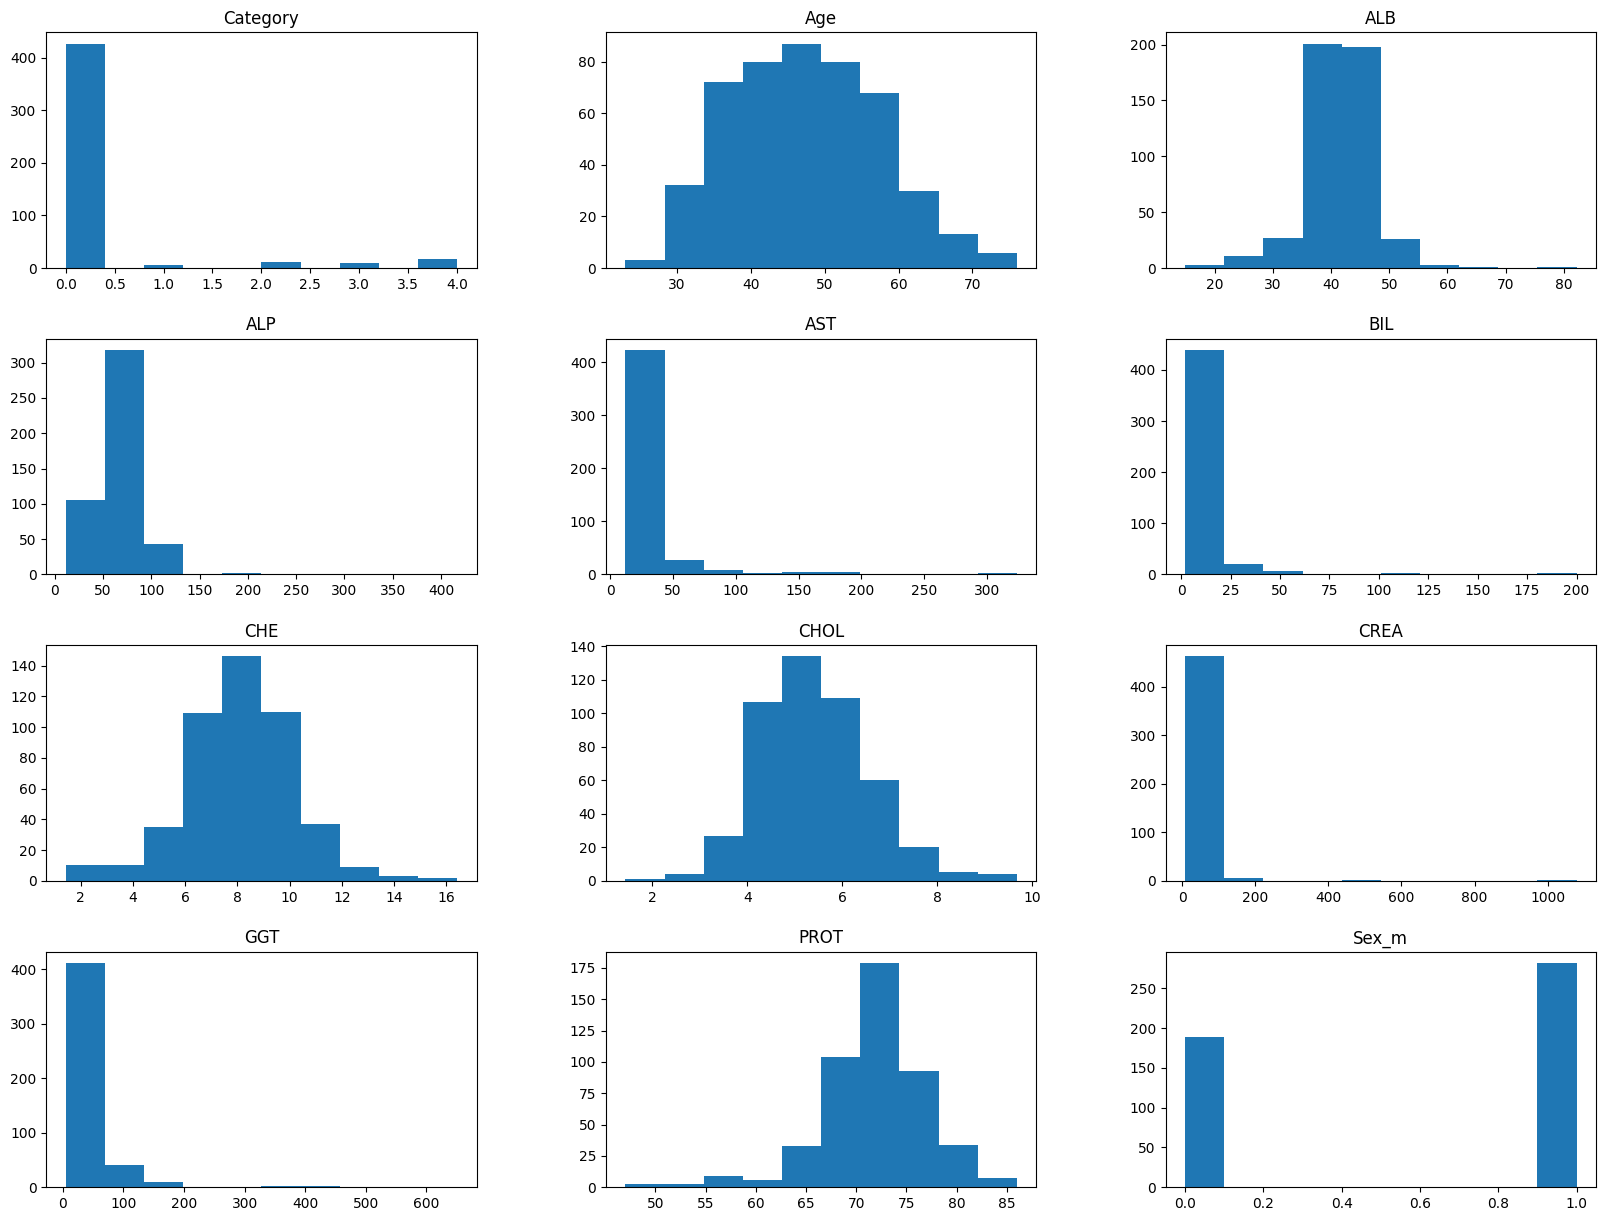

In [ ]:

X_train.hist(figsize=(20,15), grid=False);



Many of the variables have highly skewed distributions, to it could be interesting to apply logaritmic transformation and scaling to see if the distributions can be normalized.

Distribution of each variable in X_train after log transformation and scaling:


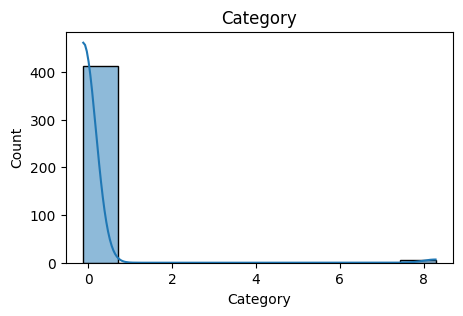

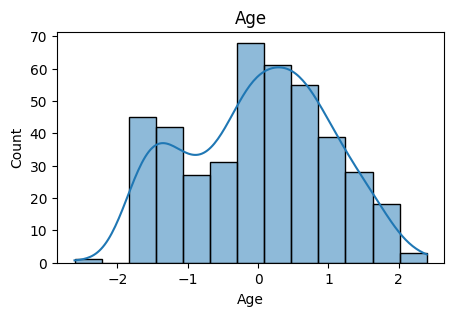

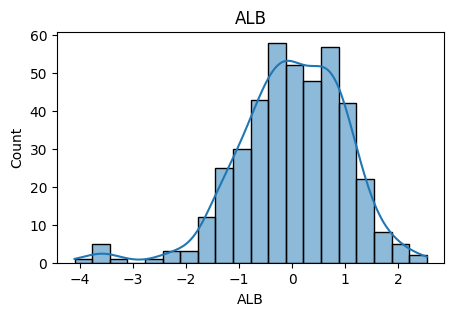

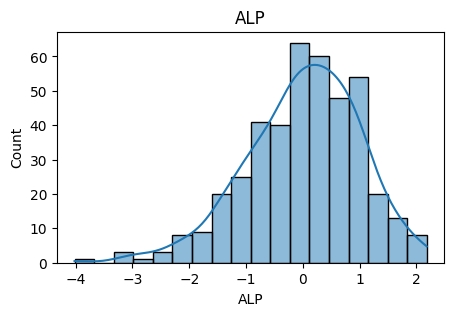

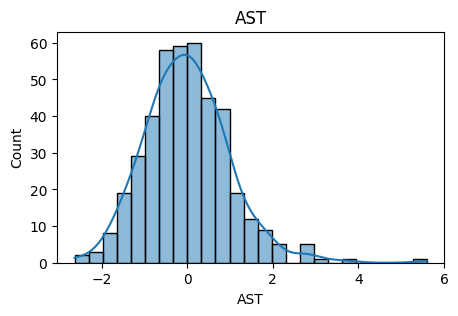

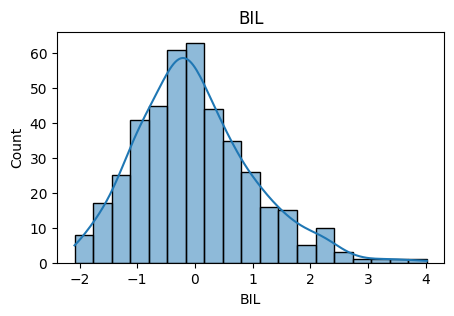

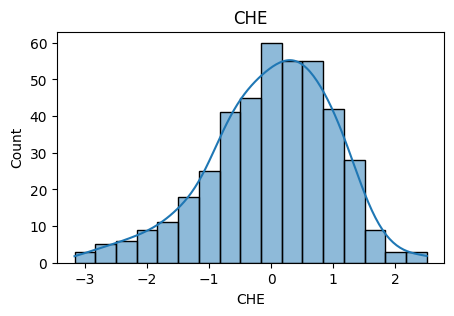

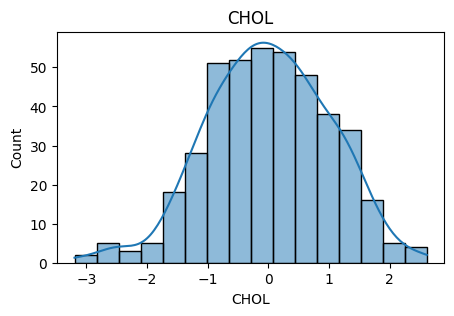

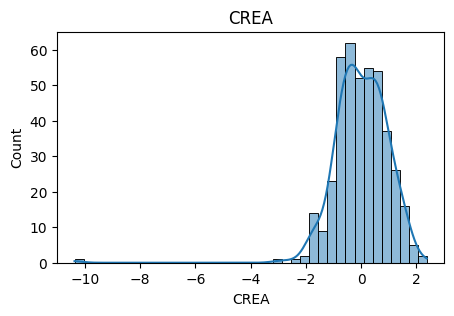

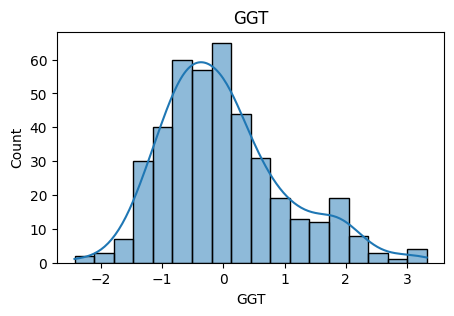

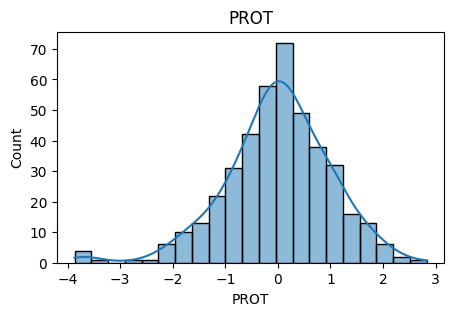

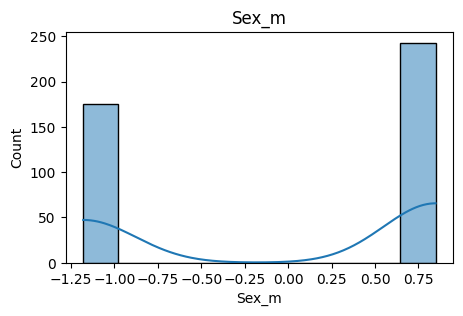


Distribution of y_train after log transformation:


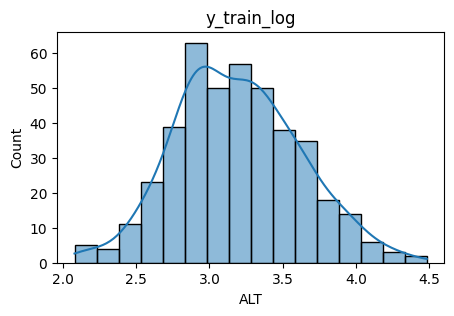

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Log transformation of both train and test data
#Clean refers to the dataset that was filtered to remove outliers based on z score
X_train_log = np.log1p(X_train_clean)
X_test_log  = np.log1p(X_test)
y_train_log = np.log1p(y_train_clean)

#Scale data
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_log)
X_test_scaled_np  = scaler.transform(X_test_log)

# Convert scaled NumPy arrays back to DataFrames for plotting
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_log.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test_log.columns)

#Distribution of each variable after log transforming and scaling
print("Distribution of each variable in X_train after log transformation and scaling:")
for col in X_train_scaled.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(X_train_scaled[col], kde=True)
    plt.title(f"{col}")
    plt.show()

print("\nDistribution of y_train after log transformation:")
plt.figure(figsize=(5,3))
sns.histplot(y_train_log, kde=True)
plt.title("y_train_log")
plt.show()

Comparing the histograms before and after log transformation, a big difference is seen. After the log transformation, the histograms show a more normal distribution even though there are still some variables with a little bit of skew.

Now the dataset is ready to perform Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

#Fitting the model
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Predict target and revert log
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

# Evaluate metrics in the original scale
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 in test set:", r2_score(y_test, y_pred))
print("R2 in training set:", r2_score(y_train_log, model.predict(X_train_scaled)))


R2 in test set: 0.47953358131443125
R2 in training set: 0.6318500421124913


The results shows 0.47 of r score meaning the model can only predict approximately 50% of the variability, which is not ideal for a model. Probably the fact that some variable are still a little bit skewed and the moderate to low correlation between variables explain this result.
Calculating the r2 score in the training set, we have a value of 0.63, which is much higher than 0.47, so clearly the model is overfitted.
In order to reduce the overfitting, Ridge and Lasso correlations will be calculated

In [ ]:
from sklearn.linear_model import Ridge

#Fit linear regression model using Ridge regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_log)#Y_train has not been scaled, that's why log data is used instead

#Model prediction
y_pred_ridge = ridge_model.predict(X_test_scaled)

#Regression model metrics in test and training sets
print("R2 in test data:", r2_score(y_test, y_pred_ridge))
print("R2 in training data:", r2_score(y_train_log, ridge_model.predict(X_train_scaled)))

R2 in test data: -1.0910494668859054
R2 in training data: 0.6318459213321845


Applying Ridge the MSE and r score are way worse than before and the difference in r2 score between the training set and the test set is quite huge, so it would be interesting to apply Lasso to see if we can get better metrics

In [ ]:
from sklearn.linear_model import Lasso

#Fit the model using Lasso regularization
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train_log)

#Predict target with the model
y_pred_lasso = ridge_model.predict(X_test_scaled)

#Regression model metrics in test and train sets
print("R2 in test data:", r2_score(y_test, y_pred_lasso))
print("R2 in training data:", r2_score(y_train_log, lasso_model.predict(X_train_scaled)))


R2 in test data: -1.0910494668859054
R2 in training data: 0.0


Ridge and Lasso regularizations give the same r score, which is way worse that the metrics we got only with log transformation so they do not work for this dataset. Additionally, the r2 score of training is way more better than for the test set, meaning the model is highly overfitted, even applying regularization.

Could be interesting to try ElasticNet with cross validation using GridSearchCV to try different alpha and l1_ratio values

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

model = ElasticNet(max_iter=10000, random_state=42)

parameters = {
    'l1_ratio':[0, 0.5, 1],
    'alpha': [0.01, 0.1, 1, 10, 100]
}

gridsearch = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2)


gridsearch.fit(X_train_scaled, y_train_log)

print("Best parameters:", gridsearch.best_params_)
print("Best mse (cross-val):", gridsearch.best_score_)

best_model = gridsearch.best_estimator_
print('Best r2 score:', best_model.score(X_test_scaled, y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
Best mse (cross-val): -0.0719280074769957
Best r2 score: -1.0914054807542612


The r2 score obtained is the same as for Ridge and Lasso regularizations so the model has not been improved really

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a pipeline with PolynomialFeatures and LinearRegression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit the pipeline on the scaled training data
model.fit(X_train_scaled, y_train_log)

# Make predictions on the scaled test data
y_pred_log = model.predict(X_test_scaled)

# Revert log transformation for evaluation
y_pred = np.expm1(y_pred_log)

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2:", r2)
print("MSE:", mse)

R2: 0.17117269462134665
MSE: 398.5265261343891


The metrics are worse than the ones we got with log transformation and simple linear regression, so by now r score of 0.47 is the highest score we could get with this technique. One last thing to try is Random Forest Regressor. This technique does not neet log transformation or scaling so X_train_clean and X_test_clean will be used to train and test the model, respectively.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_clean, y_train_clean)

y_pred_rf = rf.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, y_pred_rf))
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('R2: ', r2_score(y_test, y_pred_rf))

MAE:  10.373254237288135
MSE:  373.90663474999985
R2:  0.22237540484685703


Using Random Forest Regressor we still get a very low r score, meaning that the model is worse than just log transform and do linear regression

To summarize, the reason of this moderate to low r-score instead of a high r-score could be in the limitations of the data, the linear regression can only capture aproximately the 50% of the variability and the model has been optimized at its maximum, so as said before, this is not a suitable model for this dataset.

# Classification

For this part of the project, the objective of the dataset is to be able to predict the stage of disease using different laboratory parameters. For this reason, the target used for classification will be the column Category, using the rest of columns as features. This is a typical situation where multi-class classification methods need to be applied as we do not have 2 classes but 4.

There are tow methods that could be used: One-vs-Rest (OvR) or One-vs-One (OvO).OvR is more computationally efficient than OvO but has problems with umbalanced data. So, to decide which method to use, the number of rows of each category in the Category column must be checked to see if we have an umbalanced dataset.

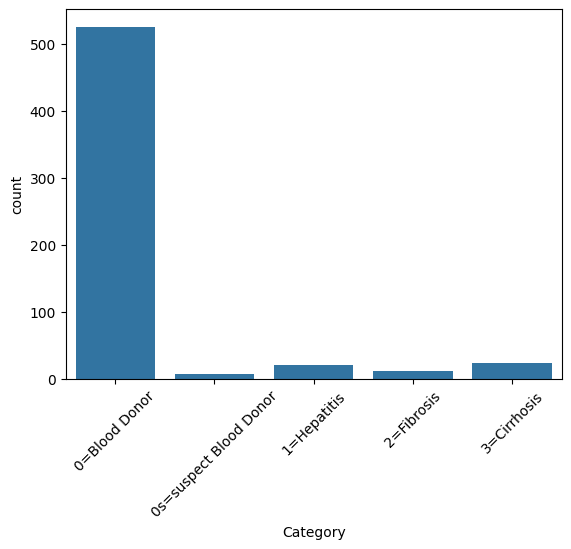

In [ ]:
#Check the number of rows of each category
sns.countplot(df_without_na, x='Category')
plt.xticks(rotation=45)
plt.show()

As seen in the plot above, category 0 has way more data than the rest of category so we are in the case of umbalanced data and the method that handles better this type of datasets is OvO.
Before applying OvO, the initial dataset will be splitted into test and train data, filtered with zscore, log transformed and scaled using StandardScaler

In [ ]:
#Define X (features) and y (Target)
X = df_without_na.drop('Category', axis=1)
y = df_without_na['Category']

#Split into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#One-Hot Encoding method for Sex column
X_train = pd.get_dummies(X_train, columns=["Sex"], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=["Sex"], drop_first=True, dtype=int)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#Label Encoding method for Category column
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#Calculate z scores for X_train and y_train
z_scores_X = np.abs(zscore(X_train))
z_score_y = np.abs(zscore(y_train))

# Define threshold to remove outliers
threshold = 3

# Create masks for both X and y training data
mask_train_X = (z_scores_X < threshold).all(axis=1)
mask_train_y = (z_score_y < threshold) # y_train is 1D, no need for .all(axis=1)

# Combine masks: keep rows where there are no outliers in either X or y
combined_mask_train = mask_train_X & mask_train_y

X_train_clean = X_train[combined_mask_train]
y_train_clean = y_train[combined_mask_train]

#Logaritmic transformation
X_train_log = np.log1p(X_train_clean)
X_test_log  = np.log1p(X_test)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled  = scaler.transform(X_test_log)


After pre-processing data, OvO can be applied to predict target. We will use class_weight='balanced' due to the imbalanced dataset we are working with

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Create a base logistic regression model instance
base_model = LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced')

# Wrap the base model in the OneVsOneClassifier
ovo_model = OneVsOneClassifier(base_model)

#Fit the OvO model
ovo_model.fit(X_train_scaled, y_train_clean)

#Make predictions
y_pred_ovo = ovo_model.predict(X_test_scaled)

#Show model scores for train and test data
print('F1 score in train data:', f1_score(y_train_clean, ovo_model.predict(X_train_scaled), average='macro'))
print('F1 score in test data:', f1_score(y_test, y_pred_ovo, average='macro'))

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovo))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ovo))

F1 score in train data: 0.9496729800761526
F1 score in test data: 0.4034965771458663
Confusion Matrix:
 [[105   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   4   0   0]
 [  0   0   2   1   0]
 [  0   0   0   5   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           3       0.17      0.33      0.22         3
           4       0.00      0.00      0.00         5

    accuracy                           0.93       118
   macro avg       0.36      0.47      0.40       118
weighted avg       0.91      0.93      0.92       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Taking a look at the classification report, we see how the class 0 have really good metrics. As we are trying to identify patients with diseases, the most dangerous parameter is the number of false negatives, so the Recall parameter is the most important. Recall values are good only for the classes 0 and 2, which correspond to 'blood donor' (meaning healthy) and hepatitis respectively.
It is good that the model can actually predict healthy patients and patients with hepatitis with high sensitivity but it cannot predict patients with fibrosis and cirrhosis (which should be more easy to identify as the laboratory parameters would be much more altered). Additionally, for patients with hepatitis the precision is not very high (only 67%) meaning that that model is giving 33% of false positives. This is not that bad as false negatives, but it has to be taken into account.

The category 1 correspond to 'suspect blood donor' which is a very confusing category that does not give any good information, so we can ignore it.

As the model is underperforming, we have two options:


*   Oversampling
*   Undersampling

As seen previously, the different of amount of data between class 0 (more than 500 samples) and the rest of classes is quite huge. Reducing data from class 0 won't help much as in the rest of classes we have around of 20 samples, which is quite low for a model to do good predictions. So in this case the best solution is to do oversampling of the minoritary categories, even though this can lead to overfitting. There are different strategies for this:

*   SMOTE: creates syntetic samples for minority classes in an uniform way across the feature space
*   ADASYN: does the same as SMOTE but detects regions where the minority classes are underrepresented and creates syntetic data there, creating a more balanced dataset

Both approaches will be tested to see which one improves the model the most






In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

#Apply SMOTE method
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_clean)

#Create a base logistic regression model instance
base_model = LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced')

# Wrap the base model in the OneVsOneClassifier
ovo_model = OneVsOneClassifier(base_model)

#Fit OvO model
ovo_model.fit(X_resampled, y_resampled)

#Make predictions
y_pred_smote = ovo_model.predict(X_test_scaled)

#Show model scores for train and test data
print('F1 score in train data:', f1_score(y_resampled, ovo_model.predict(X_resampled), average='macro'))
print('F1 score in test data:', f1_score(y_test, y_pred_smote, average='macro'))

#Calculate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

F1 score in train data: 0.9991687435122868
F1 score in test data: 0.40811320754716984
Confusion Matrix:
 [[105   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   4   0   0]
 [  0   0   2   1   0]
 [  1   0   0   4   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         5

    accuracy                           0.93       118
   macro avg       0.37      0.47      0.41       118
weighted avg       0.90      0.93      0.91       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SMOTE really does not help, as it maintains the same metrics for class 0 and 2 but does nothing for the rest of classes

ADASYN will be tested next to see if the metrics can be improved

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

#Apply ADASYN method
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train_clean)

#Create a base logistic regression model instance
base_model = LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced')

#Fit the OvO model
ovo_model = OneVsOneClassifier(base_model)
ovo_model.fit(X_resampled, y_resampled)

#Make predictions
y_pred_adasyn = ovo_model.predict(X_test_scaled)

#Show model scores for train and test data
print('F1 score in train data:', f1_score(y_resampled, ovo_model.predict(X_resampled), average='macro'))
print('F1 score in test data:', f1_score(y_test, y_pred_adasyn, average='macro'))

#Calculate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adasyn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adasyn))

F1 score in train data: 0.9991687435122868
F1 score in test data: 0.40811320754716984
Confusion Matrix:
 [[105   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   4   0   0]
 [  0   0   2   1   0]
 [  1   0   0   4   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         5

    accuracy                           0.93       118
   macro avg       0.37      0.47      0.41       118
weighted avg       0.90      0.93      0.91       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ADASYN method works better than SMOTE but we get exactly the same metrics as OvO model, so we are not improving anything really.

The last thing to try to solve the problem of an imbalanced dataset is hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Define the base model
base_model = LogisticRegression(class_weight='balanced', solver='liblinear')
# Wrap the base model in the OneVsOneClassifier
ovo_model = OneVsOneClassifier(base_model)

# Define the hyperparameter grid
# Here we test L1 and L2 penalties with a range of C values
param_grid = {
    'estimator__solver': ['liblinear'], # Use liblinear solver for L1 penalty
    'estimator__C': [0.01, 0.1, 1, 10, 100]
}
# Set up GridSearchCV
# cv=5 specifies 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores

grid_search = GridSearchCV(
    estimator=ovo_model, # The model to be tuned
    param_grid=param_grid, # The hyperparameter grid to search
    cv=5, # Number of folds for cross-validation
    scoring='f1_weighted', # Metric to optimize
    n_jobs=-1, # Use all available CPU cores for parallel processing
    verbose=2
)
# Fit the grid search to the training data (X_resampled and y_resampled from ADASYN)
grid_search.fit(X_resampled, y_resampled)

#Inspect the results
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation f1 weighted: {grid_search.best_score_:.3f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

#See the model scores in train and test data
print('F1 score in train data:', f1_score(y_resampled, best_model.predict(X_resampled), average='macro'))
print('F1 score in test data:', f1_score(y_test, y_pred_tuned, average='macro'))

#Show model metrics
print("\nConfusion Matrix (Tuned Model):\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'estimator__C': 1, 'estimator__solver': 'liblinear'}
Best cross-validation f1 weighted: 0.998
F1 score in train data: 0.9991687435122868
F1 score in test data: 0.40811320754716984

Confusion Matrix (Tuned Model):
 [[105   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   4   0   0]
 [  0   0   2   1   0]
 [  1   0   0   4   0]]

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         5

    accuracy                           0.93       118
   macro avg       0.37      0.47      0.41       118
weighted avg       0.90      0.93      0.91       118



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hyperparameter tuning with GridSearchCV gives the same results as OvO model with any hyperparameter tuning, so anything has been really improved.

Even though Naive Bayes (Gaussian type) assumes a normal distribution and this dataset has struggles with this, let's try this technique in order to improve the classification model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

#Create the model
model = GaussianNB()

#Train the model
model.fit(X_train_scaled, y_train_clean)

#Make predictions on the test set
y_pred = model.predict(X_test_scaled)

#Calculate model scores for train and test data
print("F1 score in training data:", f1_score(y_train_clean, model.predict(X_train_scaled), average='macro'))
print("F1 score in test data: ", f1_score(y_test, y_pred, average='macro'))

#Calculate model metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Inspect probabilities
sample_probs = model.predict_proba(X_test_scaled[:10])
sample_log_probs = model.predict_log_proba(X_test_scaled[:10])

print(f'\nProbabilities for the 10 first samples:\n{sample_probs}')
print(f'\nLog porbabilities for the 10 first samples:\n{sample_log_probs}')

F1 score in training data: 0.9420452074561663
F1 score in test data:  0.3286821705426356
Confusion Matrix:
 [[105   0   0   0   0]
 [  1   0   0   0   0]
 [  0   0   4   0   0]
 [  0   0   3   0   0]
 [  4   0   1   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5

    accuracy                           0.92       118
   macro avg       0.29      0.40      0.33       118
weighted avg       0.87      0.92      0.89       118


Probabilities for the 10 first samples:
[[9.99999853e-01 7.93730608e-09 1.39011322e-07]
 [9.99776657e-01 2.17638492e-04 5.70482029e-06]
 [9.99999603e-01 3.96796050e-07 4.76524999e-11]
 [9.99999986e-01 3.66884540e-11 1.37551077e-08]
 [1.00000000e+00 3.99906928e-

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The results from Naive Bayes are even worse than the previous models tried, so as expected, it is not working.

Another option for this dataset would be building a decision tree and use grid search for hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

#Create the model
tree = RandomForestClassifier(random_state=42)

#Create the parameter grid

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':['balanced'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05]
}

#Grid search with cross validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2);

#Fit the model
grid_search.fit(X_train_clean, y_train_clean)

#Best parameters and best cv score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)

#Evaluate the test set
best_tree = grid_search.best_estimator_

print('F1 score in train data:', f1_score(y_train_clean, best_tree.predict(X_train_clean), average='macro'))
#Make predictions on scaled test data
y_pred = best_tree.predict(X_test_scaled)
print('F1 score in test data:', f1_score(y_test, y_pred, average='macro'))


#Show model metrics
print("\nConfusion Matrix:", confusion_matrix(y_test, y_pred))
print("\nClassification report:", classification_report(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

The results are not improving the results of logistic regression with grid search, as it is not predicting anything but class 1 (the biggest class).
The logistic regression model predicts class 0 (mayoritary class) very well, class 2 in a moderate way, class 3 is bad predicted but it is unable to predict anything in class 1 and 4, so it is ignoring minoritary classes.

Another ensemble technique is Boosting, that instead of training models in parallel as Random Forest does, it does them sequentially, learning from the mistakes in the previous models. There are different techniques but the one that works better for umbalanced datasets (like this case) is CatBoost.

CatBoost is based in a Gradient Boosting algorithm which codifies itself the categorical variables, avoids bias due to Ordered Boosting (train each new tree just using data from previous observations in the exchange of data), manage class_weight for umbalanced datasets and uses L2 regularizations


In [ ]:
!pip install catboost

#Applying Boosting using CatBoost
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# Calculate weights of class for balancing data
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

#Create the parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500],
    'l2_leaf_reg': [3, 5, 7]
}

#Create the model
grid = GridSearchCV(
    estimator=CatBoostClassifier(class_weights=class_weights, random_seed=42, verbose=0),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
#Train the model
grid.fit(X_train_clean, y_train_clean)

#Make predictions
best_model = grid.best_estimator_
y_pred = grid.predict(X_test_scaled)

#Calculate probabilities
y_prob = grid.predict_proba(X_test_scaled)

#Show best parameters
print("Best parameters:", grid.best_params_)

#Show model scores in test and train data to see if there is overfitting:

print("F1 score in training data:", f1_score(y_train_clean, best_model.predict(X_train_clean), average='macro'))
print("F1 score in test data: ", f1_score(y_test, y_pred, average='macro'))

#Calculate model metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))

With this gradient boosting technique, we get exacly the same results as with Random Forest,  whoich predict really well the biggest class but it is unable to predict anything in the rest of the classes.

The last technique to test from ensemble learning is Stacking, which uses the predictions of different models as input features for a meta learner model

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Define the level 0 models
estimators = [
('logreg', LogisticRegression(solver='liblinear')),
('nb', GaussianNB()),
('tree', RandomForestClassifier(max_depth=5, random_state=42))
]

#Define the Level 1 meta-learner
final_estimator = LogisticRegression()

#Create the Stacking ensemble
stacking_model = StackingClassifier(
estimators=estimators,
final_estimator=final_estimator,
cv=5
)
#Fit the model
stacking_model.fit(X_train_clean, y_train_clean)

# Evaluate its performance
y_pred = stacking_model.predict(X_test)
print(f"F1 model score (test data): {f1_score(y_test, y_pred, average='macro')}")
print(f"F1 model score (train data): {f1_score(y_train_clean, stacking_model.predict(X_train_clean), average='macro')}")

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

# Clustering

The last group of methods to try is clustering. As regression and classification have not been very successful, maybe clustering is the solution to the problem.

The first technique to try is K-means. As this technique is sensitive to outliers, these need to be removed and data needs to be scaled. The target here is the same as for classification: Category column. We will try to divide the dataset into groups based on the different categories we have:


*   Blood donor
*   Suspect blood donor
*   Hepatitis
*   Fibrosis
*   Cirrhosis







In [23]:

#Preprocessing steps
#We will start using df_encoded dataset, as this has the NA values removed and the categorical variables encoded

#Calculate z scores for df_encoded
z_scores = np.abs(zscore(df_encoded))

# Define threshold to remove outliers
threshold = 3

# Create mask
mask = (z_scores < threshold).all(axis=1)

#Apply mask to df_encoded
df_encoded_clean = df_encoded[mask]

#Remove Category column from the dataset

df_encoded_clean_without_cat = df_encoded_clean.drop('Category', axis=1)

#Scale data
scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded_clean_without_cat)



After removing outliers and scale data, elbow method is applied to dinf the optimal number of clusters (k)

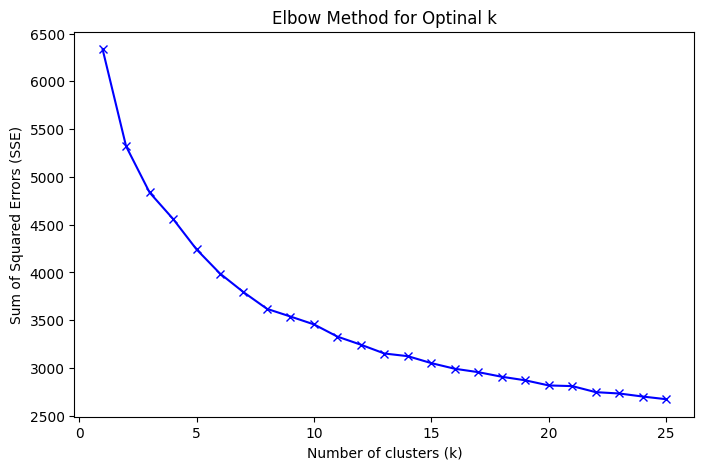

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#Find the optimal k using the elbow method
sse = []
k_range = range(1, 26)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(df_encoded_scaled)
  sse.append(kmeans.inertia_) #SSE value
#Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optinal k')
plt.show()

In the plot we can observe how the error decreases with the increase of the number of clusters. At k=10 the decrease in the error is really small so this will be the optimal number of clusters. But seeing the amount of Error and the high number of k, without seeing the distribution of clusters we could say this method most likely is not going to work.

Next step is to apply K Means with 10 clusters and plot the results. As we have many features we cannot plot everything at. Changing the columns in the plot we can see the different clusters for each pair of features but it is possible that we cannot see anything separated due to the high dimensionality.
The goal with clustering here is to find a pattern in the pattients grouped by Category of disease.

     Category  Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0           0   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1           0   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2           0   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3           0   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4           0   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   
..        ...  ...   ...   ...   ...   ...   ...    ...   ...    ...   ...   
574         3   59  44.0  34.5   8.9  74.5   6.0   9.45  4.45   65.0  95.3   
575         3   64  38.0  35.7   7.1  41.3  13.0   7.10  4.52   70.0  53.0   
578         3   38  40.0  39.8  14.9  68.9  11.0   8.55  4.31   60.5  40.1   
579         3   57  43.0  52.1   8.3  35.8  18.0   8.61  6.19   71.4  27.9   
580         3   68  43.0  22.9   5.0  42.1  12.0   7.29  4.89   80.9  11.9   

     PROT  Sex_m  
0    69.0      1  
1    76.5      1  
2    7

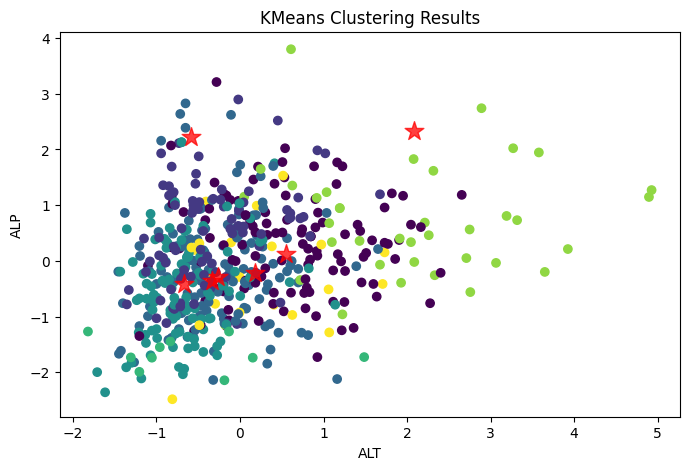

In [51]:
#Print dataset to choose columns for display
print(df_encoded_clean)

#Apply K Means with the optimal k
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(df_encoded_scaled)

#Visualize the results
plt.figure(figsize=(8, 5))
# Access columns by name for plotting the data points
plt.scatter(df_encoded_scaled[:, 3], df_encoded_scaled[:, 2], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
# Access centers using integer indices
plt.scatter(centers[:, 3], centers[:, 9], c='red', s=200, alpha=0.75, marker='*')
plt.title('KMeans Clustering Results')
plt.xlabel('ALT')
plt.ylabel('ALP')
plt.show()

Here we only see ALP vs ALT which are very good parameters to estimate Hepatitis C, and we see some groups, but definitely not very well separated. Looks like they could be differenciated in another dimension

In [52]:
#Calculate metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply K Means with the optimal k (k=10 based on the elbow method)
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(df_encoded_scaled)

#Calculate silhouette score
sil_score = silhouette_score(df_encoded_scaled, y_kmeans)
print("Silhouette Score:", sil_score)

#Add clusters to the original filtered dataset
df_clusters = df_encoded_clean.copy()
df_clusters['Cluster'] = y_kmeans

#Analyze means by cluster
# The previous output was a Series, let's convert it to a DataFrame for plotting
cluster_summary = df_clusters.groupby(['Category', 'Cluster']).size()
print(cluster_summary)


Silhouette Score: 0.11501757681305634
Category  Cluster
0         0          66
          1          91
          2          96
          4          78
          5          89
          6          15
          7          24
          8          46
2         2           1
          3           2
          4           2
          9           8
3         3           4
          9           6
dtype: int64


The Shilouette score obtained is quite bad, as it is far away from 1. Also, the dataset is quite imbalanced, as the category 0 is explained with the majority of clusters, whereas the categories 2 and 3 are explained by a few.

As said before, K Means method is not a suitable method for this dataset as it is unable to separate datapoints into clusters, datapoints from different clusters are all mixed. It assumes that the dataset is balanced when this is not the case.
Another option to apply clustering to this dataset is hierarchical clustering, which does not require to specify the number of clusters beforehand. Also this dataset is not too big so it wont take long time to get results.
The linkage chosen is Ward as the first option, but the rest of options will be tested to find the optimal one

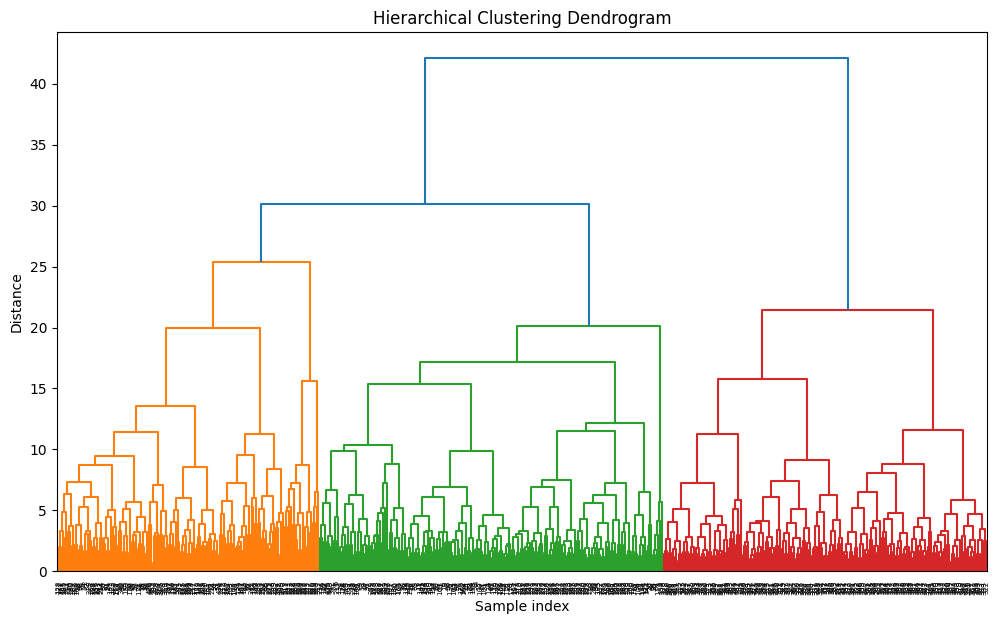

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Perform hierarchical
linked = linkage(df_encoded_scaled, 'ward')

#Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


After trying different types of linkages, the best one is ward due to its robustness towards outliers and also because it generates equilibrated clusters.

In the dendrogram we can see three main groups.

Now we need to add the clusters to the original filtered dataset and see the data in each cluster


In [54]:
# Add the cluster assignments to df_encoded_clean
# Need to use df_encoded before dropping the 'Category' column and apply the same mask
df_with_clusters = df_encoded[mask].copy()
df_with_clusters['Cluster'] = clusters

# Group by original Category and the new Cluster assignments to see the distribution
cluster_category_distribution = df_with_clusters.groupby(['Category', 'Cluster']).size().unstack(fill_value=0)

print("Distribution of original categories within each cluster:")
display(cluster_category_distribution)

Distribution of original categories within each cluster:


Cluster,1,2,3
Category,,,
0,182,194,129
2,2,0,11
3,0,1,9


In [57]:

from scipy.cluster.hierarchy import fcluster

k = 3
clusters = fcluster(linked, t=k, criterion='maxclust')

# Calculate the silhouette score
sil_score = silhouette_score(df_encoded_scaled, clusters)
print("Silhouette Score for Hierarchical Clustering (k=3):", sil_score)

Silhouette Score for Hierarchical Clustering (k=3): 0.1115467799651505


The score is basically the same as with KMeans , so there is any improvement with hierarchical clustering.
As is suspected that data could be better separated in another dimension, would be wise to perform dimensionality reduction. The first method to try is PCA.
As data is already filtered and scaled, we do not need to perform this steps so we can start with df_encoded_scaled

Original shape: (528, 12)
Reduced shape: (528, 12)


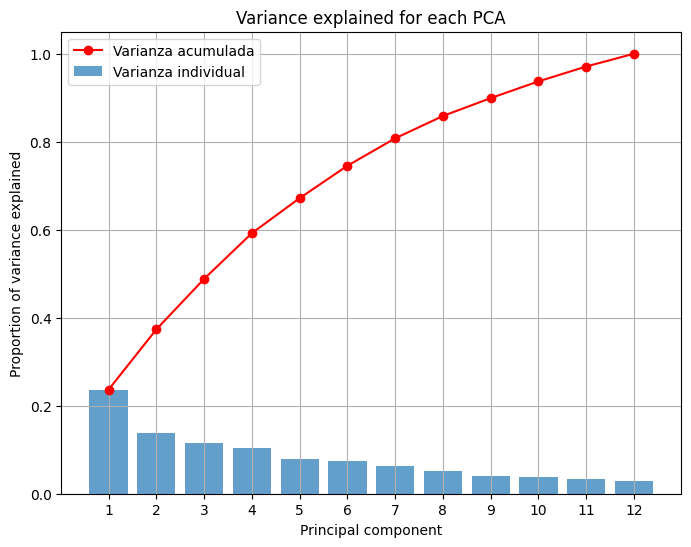

Variance explained by PC1: 0.24
Variance explained by PC2: 0.14
Variance explained by PC3: 0.11
Total variance explained by first 3 PCs:0.49


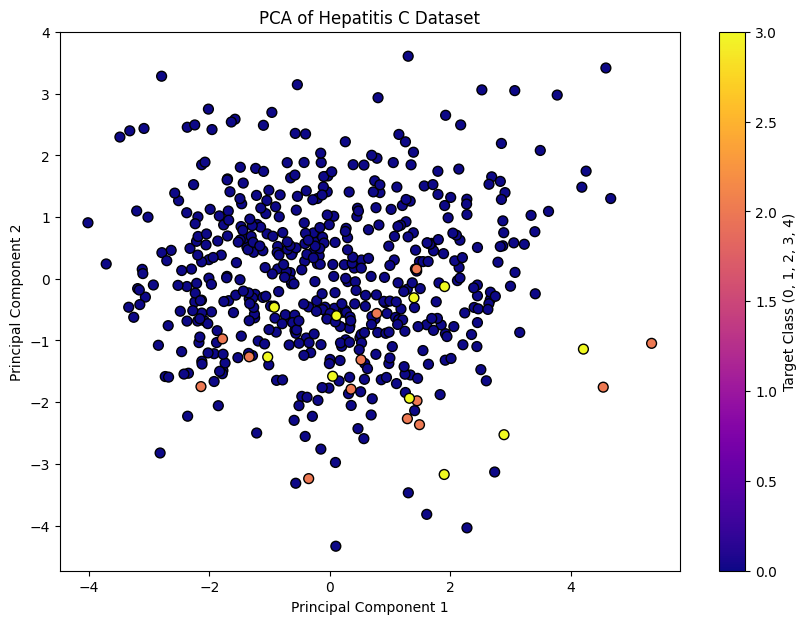

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#Apply PCA, keeping all components
pca = PCA()
df_pca = pca.fit_transform(df_encoded_scaled)

# The result is a new array with 3 features
print(f"Original shape: {df_encoded_scaled.shape}")
print(f"Reduced shape: {df_pca.shape}")

plt.figure(figsize=(8,6))
explained_var = pca.explained_variance_ratio_

# Individual variance
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label='Varianza individual')

# Accumulated variance
plt.plot(range(1, len(explained_var)+1), np.cumsum(explained_var), marker='o', color='red', label='Varianza acumulada')
plt.xticks(range(1, len(explained_var)+1))
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Variance explained for each PCA')
plt.legend()
plt.grid(True)
plt.show()

#Explained variance ratio
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Variance explained by PC3: {pca.explained_variance_ratio_[2]:.2f}")
print(f"Total variance explained by first 3 PCs:{np.sum(pca.explained_variance_ratio_[:3]):.2f}")

# Visualize the PCA results
plt.figure(figsize=(10, 7))
# Use the 'Category' column from the cleaned data for coloring
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded_clean['Category'], cmap='plasma', edgecolor='k', s=50)
plt.title('PCA of Hepatitis C Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class (0, 1, 2, 3, 4)')
plt.show()


The first plot shows the variance that each principal component explains, and also the red line shows the accumulated variance through the components, which increases with the number of components, as expected.
PC1 explains 24% of the variance whereas PC2 explains 14% and PC3 explains 13%. In total, 12 components are needed to explain all the variance. This means that any feature is dominating the variance, all are more or less equal.
If we take the first two PCs to do clustering, we would loose a lot of information, so we need almost the 12 PCs to explain the variability.
This explains why we could see any well separated clusters when we used K Means.

Lets try to use K Means with all the 12 PCs we have.

Silhouette Score: 0.134


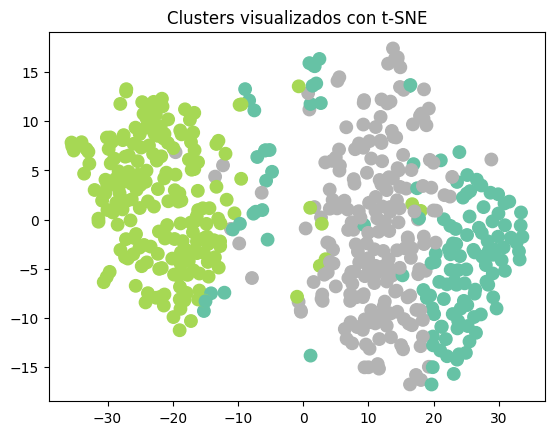

In [79]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(df_pca)

# Convert the scaled NumPy array back to a DataFrame
df_encoded_scaled_df = pd.DataFrame(df_encoded_scaled, columns=df_encoded_clean_without_cat.columns)


df_encoded_scaled_df['Cluster'] = clusters

score = silhouette_score(df_pca, clusters)
print(f"Silhouette Score: {score:.3f}")

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(df_pca)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap='Set2', s=80)
plt.title('Clusters visualizados con t-SNE')
plt.show()